In [2]:
#3.1 数据清洗：缺失值、异常值和重复值处理
#缺失值处理
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer


In [7]:
#生成缺失数据
df=pd.DataFrame(np.random.randn(6,4),columns=['col1','col2','col3','col4'])
#生成缺失数据
df.iloc[1:2,1]=np.nan 
df.iloc[4,3]=np.nan
print(df)

       col1      col2      col3      col4
0 -0.029179 -0.078952  0.449545 -0.554830
1  1.385464       NaN -0.927118  0.600712
2 -0.131733  0.636439 -0.011926  0.124894
3 -1.019999  0.733505  0.490566 -1.050307
4 -0.214910  0.132404 -0.158094       NaN
5  0.209613 -0.712246  1.139929 -0.079587


In [8]:
#查看有哪些值缺失
nan_all=df.isnull() #获得所有数据中的缺失值
print(nan_all)


    col1   col2   col3   col4
0  False  False  False  False
1  False   True  False  False
2  False  False  False  False
3  False  False  False  False
4  False  False  False   True
5  False  False  False  False


In [9]:
#查看哪些列缺失
nan_col1=df.isnull().any() #获得含有NA的列
nan_col2=df.isnull().all() #获得全部为NA的列
print(nan_col1)
print(nan_col2)


col1    False
col2     True
col3    False
col4     True
dtype: bool
col1    False
col2    False
col3    False
col4    False
dtype: bool


In [10]:
#丢弃缺失值
df2=df.dropna() #直接丢弃含有NA的行记录
print(df2)

       col1      col2      col3      col4
0 -0.029179 -0.078952  0.449545 -0.554830
2 -0.131733  0.636439 -0.011926  0.124894
3 -1.019999  0.733505  0.490566 -1.050307
5  0.209613 -0.712246  1.139929 -0.079587


In [13]:
#使用sklearn将缺失值替换为特定值
nan_result_pd1=df.fillna(method='backfill') #用后面的值替换缺失值
nan_result_pd2=df.fillna(method='bfill',limit=1) #用后面的值替换缺失值，限制每列只能替代一个缺失值
nan_result_pd3=df.fillna(method='pad') #用前面的值替换缺失值
nan_result_pd4=df.fillna(0) #用0替换缺失值
nan_result_pd5=df.fillna({'col2':1.1,'col4':1.2})
nan_result_pd6=df.fillna(df.mean()['col2':'col4'])

print(nan_result_pd1)
print(nan_result_pd2)
print(nan_result_pd3)

       col1      col2      col3      col4
0 -0.029179 -0.078952  0.449545 -0.554830
1  1.385464  0.636439 -0.927118  0.600712
2 -0.131733  0.636439 -0.011926  0.124894
3 -1.019999  0.733505  0.490566 -1.050307
4 -0.214910  0.132404 -0.158094 -0.079587
5  0.209613 -0.712246  1.139929 -0.079587
       col1      col2      col3      col4
0 -0.029179 -0.078952  0.449545 -0.554830
1  1.385464  0.636439 -0.927118  0.600712
2 -0.131733  0.636439 -0.011926  0.124894
3 -1.019999  0.733505  0.490566 -1.050307
4 -0.214910  0.132404 -0.158094 -0.079587
5  0.209613 -0.712246  1.139929 -0.079587
       col1      col2      col3      col4
0 -0.029179 -0.078952  0.449545 -0.554830
1  1.385464 -0.078952 -0.927118  0.600712
2 -0.131733  0.636439 -0.011926  0.124894
3 -1.019999  0.733505  0.490566 -1.050307
4 -0.214910  0.132404 -0.158094 -1.050307
5  0.209613 -0.712246  1.139929 -0.079587


In [14]:
##异常值处理
df=pd.DataFrame({'col1':[1,120,3,5,1,21,24],
                 'col2':[12,17,31,53,22,32,56]})
print(df)

   col1  col2
0     1    12
1   120    17
2     3    31
3     5    53
4     1    22
5    21    32
6    24    56


In [19]:
# 通过Z-Score方法判断异常值
df_zscore = df.copy()  # 复制一个用来存储Z-score得分的数据框
cols = df.columns  # 获得数据框的列名
for col in cols:  # 循环读取每列
    df_col = df[col]  # 得到每列的值
    z_score = (df_col - df_col.mean()) / df_col.std()  # 计算每列的Z-score得分
    df_zscore[col] = z_score.abs() > 2.2  # 判断Z-score得分是否大于2.2，如果是则是True，否则为False
print (df_zscore)  # 打印输出

    col1   col2
0  False  False
1   True  False
2  False  False
3  False  False
4  False  False
5  False  False
6  False  False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
col1    7 non-null int64
col2    7 non-null int64
dtypes: int64(2)
memory usage: 192.0 bytes


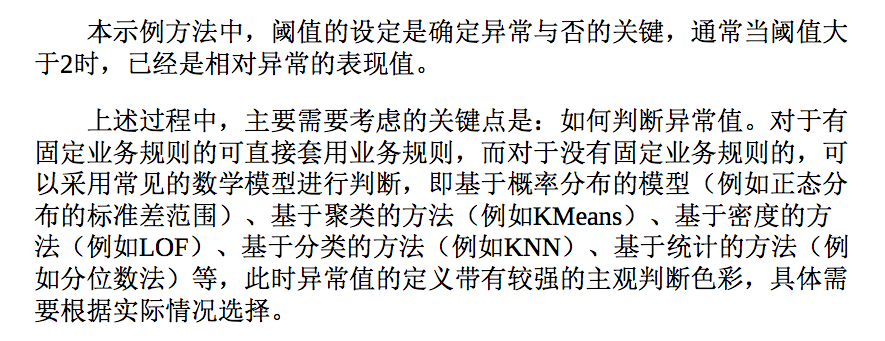

In [20]:
#生成重复数据
data1 = ['a', 3]
data2 = ['b', 2]
data3 = ['a', 3]
data4 = ['c', 2]
df=pd.DataFrame([data1,data2,data3,data4],columns=['col1','col2'])
print(df)

  col1  col2
0    a     3
1    b     2
2    a     3
3    c     2


In [21]:
#判断重复数据
isDuplicated=df.duplicated() #判断重复数据记录
print(isDuplicated)

0    False
1    False
2     True
3    False
dtype: bool


In [23]:
#删除重复值
new_df1=df.drop_duplicates() #删除数据记录中所有列相同的记录
new_df2=df.drop_duplicates(['col1'])# 删除数据记录中col1值相关的记录
new_df3=df.drop_duplicates('col2') #删除数据记录中col2值相同的记录
new_df4=df.drop_duplicates(['col1','col2']) #删除数据记录中制定列（col1/col2值相同的记录）

print(new_df1)
print(new_df2)
print(new_df3)
print(new_df4)

  col1  col2
0    a     3
1    b     2
3    c     2
  col1  col2
0    a     3
1    b     2
3    c     2
  col1  col2
0    a     3
1    b     2
  col1  col2
0    a     3
1    b     2
3    c     2
